# Image Classification

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_to_zip = 'cats_and_dogs_filtered'
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

In [3]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
test_cats_dir = os.path.join(test_dir, 'cats')  # directory with our validation cat pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')  # directory with our validation dog pictures

### Understand the data

In [4]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_tst = len(os.listdir(test_cats_dir))
num_dogs_tst = len(os.listdir(test_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_test = num_cats_tst + num_dogs_tst

In [5]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total testing cat images:', num_cats_tst)
print('total testing dog images:', num_dogs_tst)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_test)

total training cat images: 1000
total training dog images: 1000
total testing cat images: 500
total testing dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

### Data Preparation

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255)# Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255) #Generator for out testing data

In [8]:
train_data_generator = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
test_data_generator = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1000 images belonging to 2 classes.


### Data visualizing

In [10]:
sample_training_images, _ = next(train_data_generator)

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

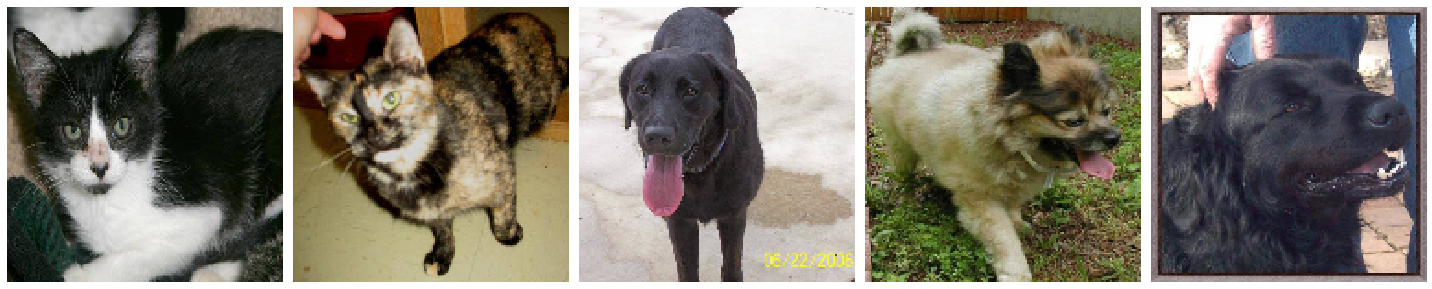

In [12]:
plotImages(sample_training_images[:6])

### Creating Model

# 1) CONV

In [15]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(train_data_generator,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=test_data_generator,
                    validation_steps=total_test // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 52s 3s/step - loss: 0.9081 - accuracy: 0.5053 - val_loss: 0.6949 - val_accuracy: 0.5011
Epoch 2/15
15/15 [==============================] - 21s 1s/step - loss: 0.6893 - accuracy: 0.5011 - val_loss: 0.7013 - val_accuracy: 0.6529
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 0.6709 - accuracy: 0.5358 - val_loss: 0.6604 - val_accuracy: 0.5536
Epoch 4/15
15/15 [==============================] - 20s 1s/step - loss: 0.6307 - accuracy: 0.6298 - val_loss: 0.6391 - val_accuracy: 0.6116
Epoch 5/15
15/15 [==============================] - 18s 1s/step - loss: 0.5686 - accuracy: 0.6918 - val_loss: 0.5911 - val_accuracy: 0.6853
Epoch 6/15
15/15 [==============================] - 18s 1s/step - loss: 0.5117 - accuracy: 0.7441 - val_loss: 0.6374 - val_accuracy: 0.6652
Epoch 7/15
15/15 [==============================] - 19s 1s/step - los

### Visualizing training data

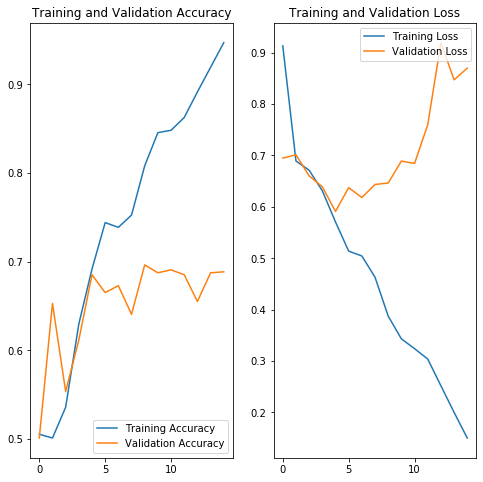

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Overfitting
To solve the over fitting

### Data augmentation

In [20]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [21]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

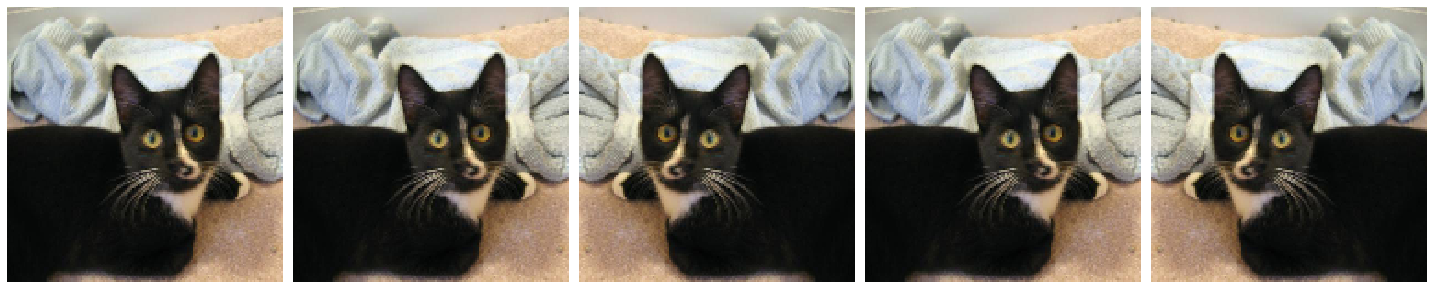

In [23]:
plotImages(augmented_images)

In [24]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [25]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


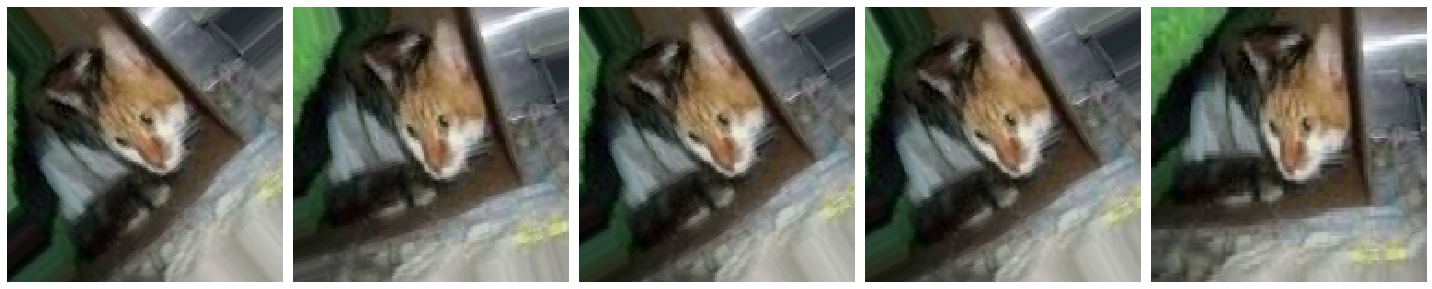

In [26]:
plotImages(augmented_images)

In [27]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [28]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


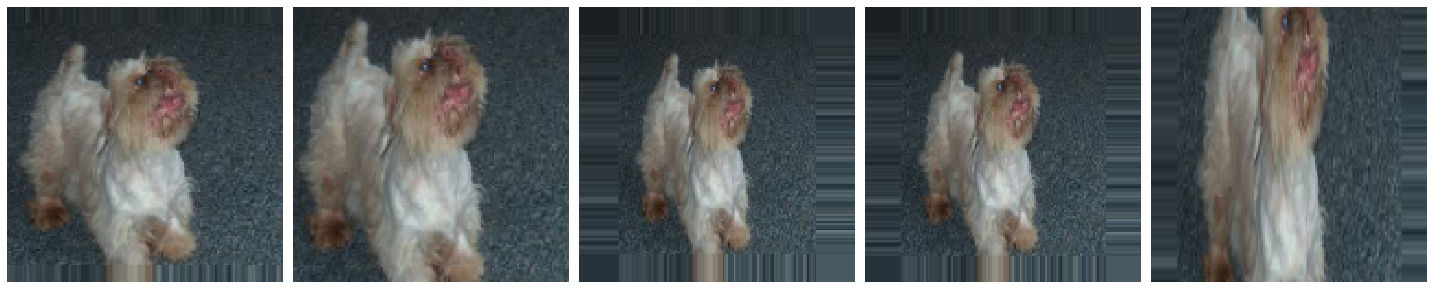

In [29]:
plotImages(augmented_images)

In [30]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [31]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


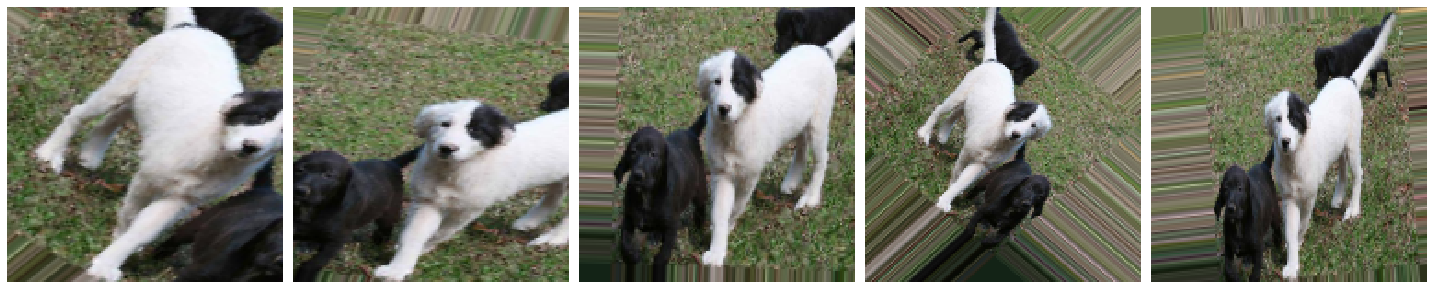

In [32]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [33]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [34]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=test_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


# Dropout

In [35]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [36]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [38]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_test // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 105s 7s/step - loss: 0.9210 - accuracy: 0.5032 - val_loss: 0.6896 - val_accuracy: 0.4978
Epoch 2/15
15/15 [==============================] - 30s 2s/step - loss: 0.6920 - accuracy: 0.4984 - val_loss: 0.6773 - val_accuracy: 0.5234
Epoch 3/15
15/15 [==============================] - 27s 2s/step - loss: 0.6810 - accuracy: 0.5262 - val_loss: 0.6609 - val_accuracy: 0.5692
Epoch 4/15
15/15 [==============================] - 30s 2s/step - loss: 0.6669 - accuracy: 0.5646 - val_loss: 0.6590 - val_accuracy: 0.5592
Epoch 5/15
15/15 [==============================] - 31s 2s/step - loss: 0.6707 - accuracy: 0.5427 - val_loss: 0.6718 - val_accuracy: 0.5279
Epoch 6/15
15/15 [==============================] - 29s 2s/step - loss: 0.6482 - accuracy: 0.5737 - val_loss: 0.6219 - val_accuracy: 0.6194
Epoch 7/15
15/15 [==============================] - 28s 2s/step - lo

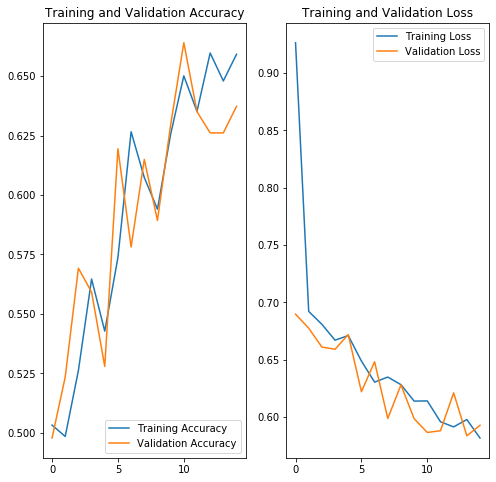

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
